In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('train-cars24-car-price.csv')
df.head()

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti SX4 Zxi BSIII,2.85,2007.0,Individual,110000,Petrol,Manual,15.00,1586.0,104.68,5.0
1,Hyundai i20 Sportz 1.4 CRDi,4.70,2012.0,Dealer,70000,Diesel,Manual,21.90,1396.0,88.76,5.0
2,Maruti Swift VDI BSIV,5.25,2015.0,Individual,70000,Diesel,Manual,25.20,1248.0,74.00,5.0
3,Honda City 1.3 EXI,1.25,2005.0,Individual,90000,Petrol,Manual,13.00,1343.0,90.00,5.0
4,Volkswagen Polo 1.2 MPI Comfortline,4.65,2015.0,Dealer,41000,Petrol,Manual,16.47,1198.0,74.00,5.0


<AxesSubplot:title={'center':'MaxPower vs. Price'}, xlabel='max_power', ylabel='selling_price'>

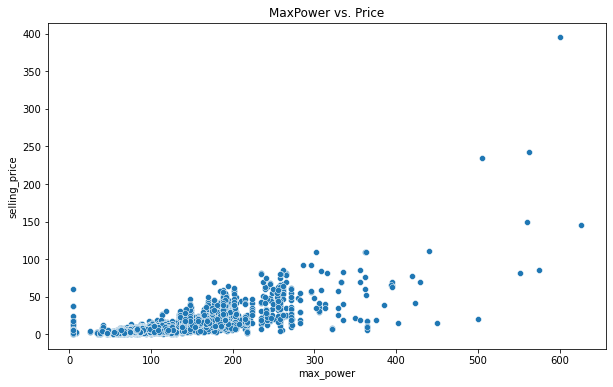

In [3]:
# Plotting the scatter plot for two columns
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title('MaxPower vs. Price')
sns.scatterplot(data=df, x='max_power', y='selling_price')

In [4]:
maxpower = df.max_power
maxpower

0        104.68
1         88.76
2         74.00
3         90.00
4         74.00
          ...  
13981    103.20
13982     82.00
13983     83.14
13984     63.00
13985     83.14
Name: max_power, Length: 13986, dtype: float64

In [5]:
# for creating a model a mathematical function should be
# price = m * maxpower + c

def estimate_charges(maxpower, w, b):
    return w * maxpower + b


In [8]:
w = 50
b = 100

In [9]:
maxpower = df.max_power
maxpower

0        104.68
1         88.76
2         74.00
3         90.00
4         74.00
          ...  
13981    103.20
13982     82.00
13983     83.14
13984     63.00
13985     83.14
Name: max_power, Length: 13986, dtype: float64

In [10]:
estimated_charges = estimate_charges(maxpower, w, b)

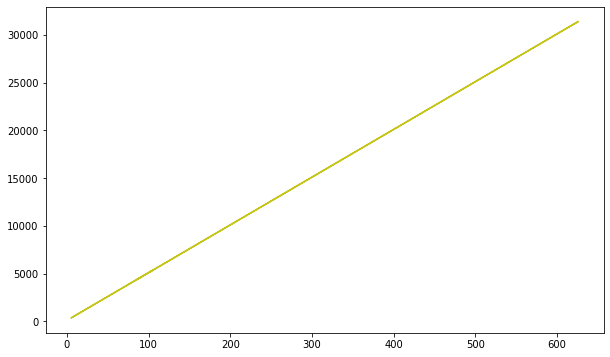

In [11]:
target = df.selling_price
plt.figure(figsize=(10,6))
plt.plot(maxpower, estimated_charges, 'y', alpha=0.9)

#### bring the scatter plot in this

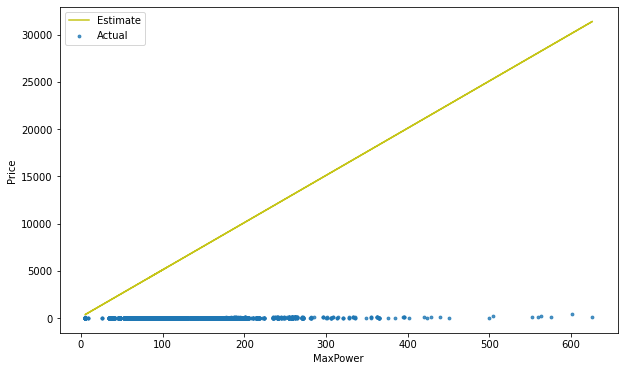

In [12]:
target = df.selling_price
plt.figure(figsize=(10,6))
plt.plot(maxpower, estimated_charges, 'y', alpha=0.9)
plt.scatter(maxpower, target, s=8, alpha=0.8)
plt.xlabel('MaxPower')
plt.ylabel('Price')
plt.legend(['Estimate', 'Actual'])

#### This didn't work with us

### for trying the different parameters create a function for this

In [13]:
def try_parameters(w, b):
    maxpower = df.max_power
    target = df.selling_price
    
    estimated_charges = estimate_charges(maxpower, w, b)
    plt.figure(figsize=(10,6))
    plt.plot(maxpower, estimated_charges, 'r', alpha=0.9)
    plt.scatter(maxpower, target, s=8, alpha=0.8)
    plt.xlabel('MaxPower')
    plt.ylabel('Price')
    plt.legend(['Estimate', 'Actual'])

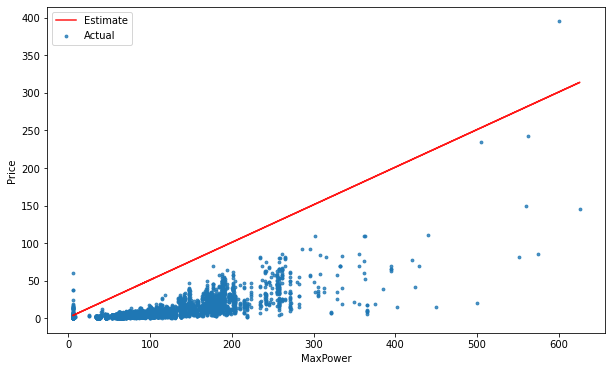

In [14]:
try_parameters(0.5,1)

#### this is not a best fit line but better than previous one

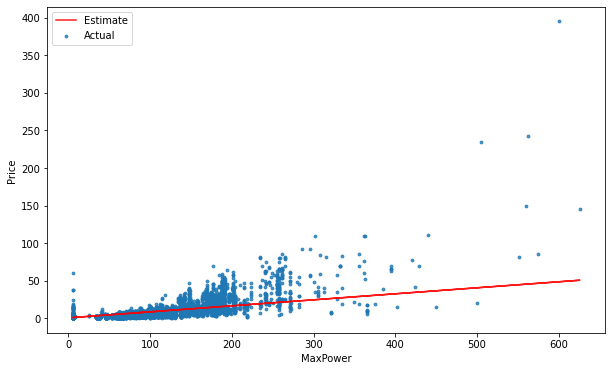

In [15]:
try_parameters(0.08,0.5)

### this is now better the best fit line

### this is just the intuition of best-fit line there better algo for this

### how changing the value of w and b is going to make your line slightly towards the fitter line across.

### this we are doing randomly but in machine learning there is gradient descent algo 

### this do something similar. It is going to start with some random values.

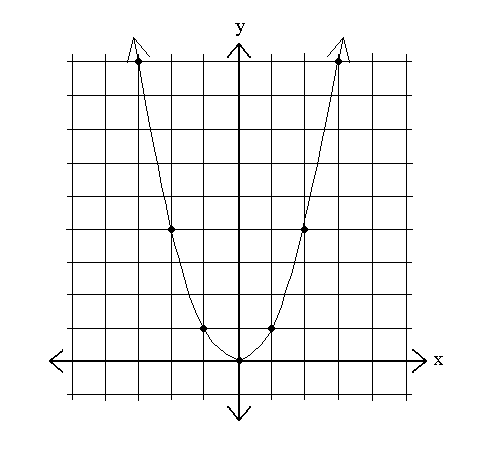

### Let's at origin there is reflecting data point where value will be minimum
### When i put random value of w & b there will randomly error (let's say)

### gradient descent algo bascially help us to optimize

### It will choose a random value such a way that the point (error) will come. Slowly, it will keep on coming down and it will reach to the point minima and we need to stop there. For stopping algo will take care of this

### Using, this method we will start randomly somewhere and will be able to reach to the value of w & b in such a way that you will be hitting the almost the lowest error possible line as well. This is what gradient descent algo will do .

In [16]:
dataframe = pd.read_csv('cars24-car-price-clean.csv')
dataframe.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


### chosing the model column to predict the selling price

In [34]:
# model : x1
# price : y
# y = f(x)

In [35]:
# X = dataframe["model"]
# X
# this will give the model value along with the index

In [36]:
X = dataframe["model"].values
X
# values will remove the index value

array([-1.12568266, -0.3332271 , -0.78980745, ..., -0.4486842 ,
        0.32802721,  1.03651397])

In [37]:
Y = dataframe["selling_price"].values
Y

array([-1.11104589, -0.22394353, -0.91505816, ..., -0.48182212,
        1.16860087,  1.11702515])

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
# creating object linear regression class
model = LinearRegression()

In [40]:
type(model)

sklearn.linear_model._base.LinearRegression

In [41]:
model.fit(X,Y)

ValueError: Expected 2D array, got 1D array instead:
array=[-1.12568266 -0.3332271  -0.78980745 ... -0.4486842   0.32802721
  1.03651397].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# problem is here that expecting 2D array

In [42]:
X.shape

(19820,)

In [43]:
Y.shape

(19820,)

In [44]:
X= X.reshape(X.size,1)

In [45]:
X.shape

(19820, 1)

In [46]:
Y= Y.reshape(Y.size,1)

In [47]:
Y.shape

(19820, 1)

In [48]:
model.fit(X,Y)

LinearRegression()

In [49]:
model.predict(X)

array([[-1.08634131],
       [-0.32158118],
       [-0.76220457],
       ...,
       [-0.43300319],
       [ 0.31656303],
       [ 1.00028896]])

In [50]:
y_hat = model.predict(X)

In [51]:
y_hat

array([[-1.08634131],
       [-0.32158118],
       [-0.76220457],
       ...,
       [-0.43300319],
       [ 0.31656303],
       [ 1.00028896]])

In [52]:
Y

array([[-1.11104589],
       [-0.22394353],
       [-0.91505816],
       ...,
       [-0.48182212],
       [ 1.16860087],
       [ 1.11702515]])

In [53]:
# c value
model.intercept_

array([-1.18731936e-16])

In [54]:
# m value
model.coef_

array([[0.96505112]])

In [35]:
price =  0.9650 * model - 1.1873
# y =    m           x  +    c


TypeError: unsupported operand type(s) for *: 'float' and 'LinearRegression'

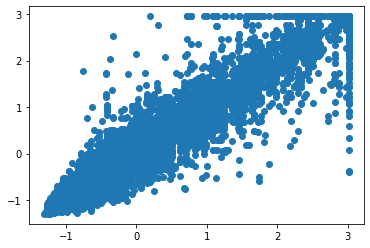

In [55]:
fig = plt.figure()
plt.scatter(X,Y, label='data')

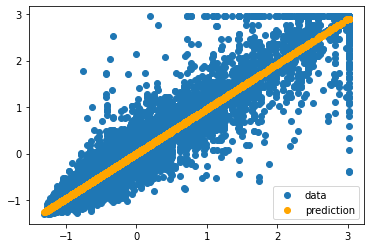

In [57]:
fig = plt.figure()
plt.scatter(X,Y, label='data')
# predicted 
plt.scatter(X,y_hat, color='orange', label='prediction')
plt.legend()
plt.show()

In [58]:
model.score(X,Y)

0.9313236629576508

In [59]:
## Fitting of a line and Gradient Descent together with 3D.
<center><img src="https://drive.google.com/uc?id=1xBEVsBhLqPbZKetapxFdBybWmMycsJpT" width="700" height="450">
</center>

SyntaxError: invalid syntax (2847042935.py, line 2)

In [1]:
dataframe.head()

NameError: name 'dataframe' is not defined

In [91]:
Y = dataframe["selling_price"]

In [92]:
X = dataframe[dataframe.columns.drop('selling_price')]

In [93]:
X = X.to_numpy()
Y = Y.to_numpy()

In [94]:
X.shape

(19820, 17)

In [95]:
Y.shape

(19820,)

In [96]:
Y = Y.reshape(Y.size,1)

In [97]:
model.fit(X,Y)

LinearRegression()

In [103]:
y_hat = model.predict(X)
y_hat

array([[-1.1835158 ],
       [-0.29402665],
       [-0.89531984],
       ...,
       [-0.32372753],
       [-0.86307897],
       [ 1.04517684]])

In [100]:
print(model.coef_)

[[ 3.12714359e+10 -1.82380676e-02 -4.86831456e-02  3.13901232e-02
   2.73650325e-02  3.12714359e+10  6.07820879e-02  7.94152064e-01
  -1.69558910e-02 -3.47477964e-03  1.40830690e-02  1.27530900e-02
   2.83112485e-03 -2.25858065e-02 -1.29335793e-02 -2.46436303e-02
  -3.26560109e-02]]


In [101]:
model.intercept_

array([4.21299703e-05])

In [102]:
model.score(X,Y)

0.9421886951844269